In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Feed Forward ANN from scratch

<img src="FeedForward.png" alt="drawing" width="600"/>

### Load Data

In [2]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 500, noise = 0.2, random_state= 42)

#### Check shape

In [3]:
X.shape, y.shape

((500, 2), (500,))

In [4]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

#### Plot

Text(0, 0.5, 'X1')

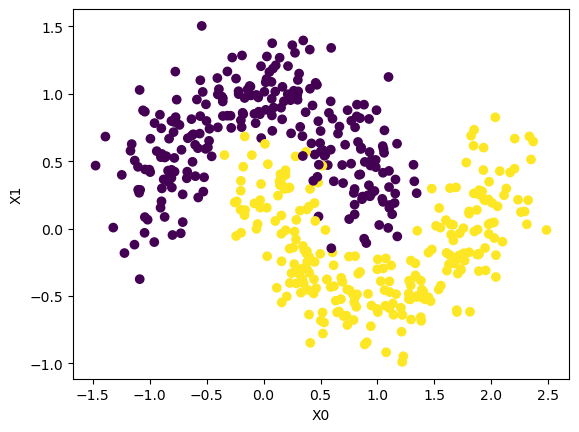

In [5]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel('X0')
plt.ylabel('X1')

#### Create a nice function to add the bias to any array

In [6]:
def add_bias(arr):
    arr = np.hstack([arr, np.ones((arr.shape[0], 1))])
    return arr

In [7]:
X = add_bias(X)
X.shape

(500, 3)

### Define activation function
- Sigmoid function:
$s =  \frac{\mathrm{1} }{\mathrm{1} + e^-z } $

In [8]:
def sigmoid(arr):
    s = 1/(1+np.exp(-arr))
    return s

##### Test if you have the correct function with following code

In [9]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

### Weights
- Initialize them randomly
- HOW MANY and in which SHAPE:
    - `3,2` for the input layer
    - `3,1` for the output layer


In [10]:
weights_h = np.random.normal(size=(3,2))
weights_o = np.random.normal(size=(3,1))

#### Check the shapes

In [11]:
weights_h.shape

(3, 2)

In [12]:
weights_o.shape

(3, 1)

In [13]:
X.shape

(500, 3)

#### Check that the dot product works

In [14]:
np.dot(X, weights_h).shape

(500, 2)

<img src="FeedForward.png" alt="drawing" width="600"/>

In [15]:
def feed_forward(X, weights_h, weights_o):

    """
    1. Calculate the dot product of X
       and the weights of the first layer.

    2. Apply the sigmoid function on the result.

    3. Append an extra column of ones to the result (i.e. the bias).

    4. Calculate the dot product of the previous step
       with the weights of the second (i.e. outer) layer.

    5. Apply the sigmoid function on the result.

   - Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """
    print('X with bias')
    print(X)
    # 1. H_in
    weighted_sum = np.dot(X,weights_h)
    print(f'Shape of H_in = {weighted_sum.shape}')
    print('H_in')
    print(weighted_sum)
    
    # 2. H_out
    output_1 = sigmoid(weighted_sum)
    print('H_out')
    print(output_1)
    
    # 3. add bias
    input_out = add_bias(output_1)
    print('H_out with bias')
    print(input_out)
    
    # 4. O_in
    print(f'Shape of H_in = {weighted_sum.shape}')
    weighted_sum = np.dot(input_out,weights_o)
    print('O_in')
    print(weighted_sum)
    
    # 5. O_out -> actual prediction
    output_2 = sigmoid(weighted_sum)
    print('O_out')
    print(output_2)      
    
    # 6.
    return output_1, output_2

### Assertion Test for `weights` shapes

In [16]:
out1, out2 = feed_forward(X,weights_h,weights_o)

X with bias
[[ 0.83085779 -0.33434228  1.        ]
 [ 0.99170955  0.87899966  1.        ]
 [ 1.1072453  -0.47034376  1.        ]
 ...
 [ 0.34554819 -0.1284342   1.        ]
 [ 1.40388981 -0.46699326  1.        ]
 [ 0.07559428  1.37596545  1.        ]]
Shape of H_in = (500, 2)
H_in
[[-1.86328247e-01  3.19430220e-01]
 [ 7.56873119e-01  3.90219334e-01]
 [-5.46564491e-02  3.94613166e-01]
 [-5.30176755e-02  7.36941602e-02]
 [ 5.85670127e-01  2.34153679e-01]
 [ 5.58276035e-02  4.44786874e-01]
 [ 8.90809407e-02  4.02581650e-01]
 [ 2.66526252e-01  1.47307635e-01]
 [ 1.78149782e-01  2.50912283e-01]
 [ 5.20089974e-01  5.66492382e-01]
 [ 2.05119021e-01  3.79155120e-01]
 [-7.97900816e-01 -4.77265169e-02]
 [ 3.22508831e-01  5.58305656e-01]
 [ 3.67800205e-02  1.74803654e-01]
 [ 1.13340470e-01  4.61280423e-01]
 [ 4.60831897e-02  4.40996167e-01]
 [ 1.19855891e+00  6.58327986e-01]
 [ 4.39410172e-01  3.66855188e-01]
 [-5.09783505e-01  2.66119150e-01]
 [ 5.59294626e-01  5.74518459e-01]
 [ 1.10185494e+00 

In [17]:
out1, out2 = feed_forward(X, weights_h, weights_o)
assert out1.shape == (50, 2)
assert out2.shape == (50, 1)

X with bias
[[ 0.83085779 -0.33434228  1.        ]
 [ 0.99170955  0.87899966  1.        ]
 [ 1.1072453  -0.47034376  1.        ]
 ...
 [ 0.34554819 -0.1284342   1.        ]
 [ 1.40388981 -0.46699326  1.        ]
 [ 0.07559428  1.37596545  1.        ]]
Shape of H_in = (500, 2)
H_in
[[-1.86328247e-01  3.19430220e-01]
 [ 7.56873119e-01  3.90219334e-01]
 [-5.46564491e-02  3.94613166e-01]
 [-5.30176755e-02  7.36941602e-02]
 [ 5.85670127e-01  2.34153679e-01]
 [ 5.58276035e-02  4.44786874e-01]
 [ 8.90809407e-02  4.02581650e-01]
 [ 2.66526252e-01  1.47307635e-01]
 [ 1.78149782e-01  2.50912283e-01]
 [ 5.20089974e-01  5.66492382e-01]
 [ 2.05119021e-01  3.79155120e-01]
 [-7.97900816e-01 -4.77265169e-02]
 [ 3.22508831e-01  5.58305656e-01]
 [ 3.67800205e-02  1.74803654e-01]
 [ 1.13340470e-01  4.61280423e-01]
 [ 4.60831897e-02  4.40996167e-01]
 [ 1.19855891e+00  6.58327986e-01]
 [ 4.39410172e-01  3.66855188e-01]
 [-5.09783505e-01  2.66119150e-01]
 [ 5.59294626e-01  5.74518459e-01]
 [ 1.10185494e+00 

AssertionError: 

#### Plot result

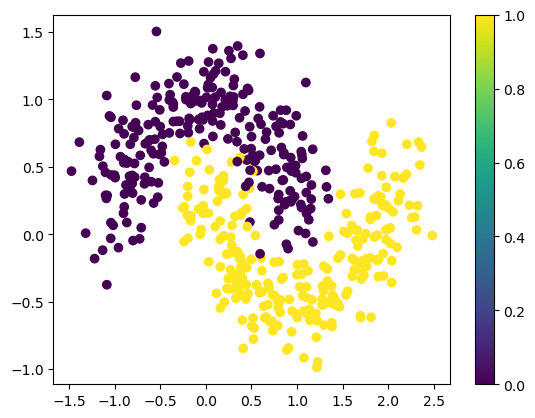

In [18]:
# Data
plt.scatter(X[:,0], X[:,1], c = y)
plt.colorbar()

In [19]:
out2.shape

(500, 1)

In [20]:
y.shape

(500,)

In [21]:
out2.flatten().shape

(500,)

In [22]:
out2 = out2.round()

In [23]:
out2

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [24]:
sum(out2.flatten().round() == y)/len(y)

0.5

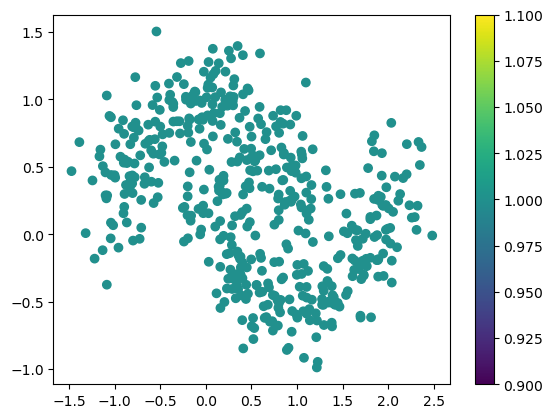

In [25]:
# prediction
plt.scatter(X[:,0], X[:,1], c = out2)
plt.colorbar()

#### What does the result mean?

- Nothing, we're predicting whatever
- We're not optimising or weights -> we're not learning anything (yet)
- So far, we only have the system of information flow depending on weights

---

### Get Accuracy
- flatten both `ytrue` and `ypred` (so that they're both (50,) arrays)
- round the `ypred` (either up to 1 or down to 0)
- compare them to each other to get a boolean array (True where the values are the same, False where they are not)
- sum the boolean array and divide by the length (i.e. take the mean)

In [26]:
def get_accuracy(ypred,ytrue):
    
    acc = sum(ytrue.flatten() == ypred.flatten().round().astype(np.int64))
    return acc/len(ytrue)

In [39]:
get_accuracy(out2, y)

0.5

In [44]:
from tensorflow.keras import backend as K

K.clear_session()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,InputLayer
from tensorflow.keras.optimizers import Adam,SGD

model = Sequential()
# run this as soon as you want to restart creating a model!


In [51]:
import tensorflow as tf

# define your model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# build the model
model.build(input_shape=(None, 784))

# call the model on some data to trigger the build process
output = model(tf.ones((1, 784)))

In [52]:
model.add(Dense(units=128,activation='sigmoid',name='hiddenlayer_1'))
model.add(Dense(units=32,activation='sigmoid',name='hiddenlayer_2'))

In [53]:
model.add(Dense(units=1,activation='sigmoid')) #last layer no. of units = objects to classify


In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 hiddenlayer_1 (Dense)       (None, 128)               1408      
                                                                 
 hiddenlayer_2 (Dense)       (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 56,459
Trainable params: 56,459
Non-trainable params: 0
_________________________________________________________________


In [55]:
# optimizer - the algorithm used to optimize the weights
#loss - how the loss is quantified (real values)
# metrics - how good the model performs (not used by opt. algorithm)

model.compile(optimizer=Adam(learning_rate=0.1),loss='binary_crossentropy',metrics='accuracy') # 0.1,0.01,0.001

In [56]:
from tensorflow.keras.callbacks import EarlyStopping